## Phase 5: Transformation & Features

### Motivation
In this phase, we create transformed features that make patterns clearer, reduce skew, and support interactive dashboard exploration.

### Questions to answer
1. What derived variables would help answer my questions?
2. How should I bin continuous variables for analysis?
3. What date features are relevant?
4. Do I need numeric representations of categories?

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("ggplot")

df = pd.read_csv("../data/raw/amazon_sales_2025_INR.csv")
df["Date"] = pd.to_datetime(df["Date"])

df.head()


,Order_ID,Date,Customer_ID,Product_Category,Product_Name,Quantity,Unit_Price_INR,Total_Sales_INR,Payment_Method,Delivery_Status,Review_Rating,Review_Text,State,Country
0,ORD100000,2025-01-25,CUST2796,Home & Kitchen,Cookware Set,2,25574.41,51148.82,Credit Card,Returned,1,Waste of money,Sikkim,India
1,ORD100001,2025-08-28,CUST9669,Beauty,Hair Dryer,1,19361.41,19361.41,Debit Card,Returned,5,Excellent product!,Telangana,India
2,ORD100002,2025-02-27,CUST5808,Electronics,Tablet,3,38476.22,115428.66,Cash on Delivery,Delivered,3,Fair deal,Nagaland,India
3,ORD100003,2025-02-24,CUST5889,Electronics,Headphones,5,38145.72,190728.60,Credit Card,Delivered,5,Highly recommend!,Assam,India
4,ORD100004,2025-06-15,CUST9005,Clothing,Saree,5,45940.98,229704.90,UPI,Delivered,5,Highly recommend!,Odisha,India


In [3]:
df["Month"] = df["Date"].dt.month
df["Month_Name"] = df["Date"].dt.strftime("%b")
df["Quarter"] = df["Date"].dt.quarter

df[["Date", "Month", "Month_Name", "Quarter"]].head()


,Date,Month,Month_Name,Quarter
0,2025-01-25,1,Jan,1
1,2025-08-28,8,Aug,3
2,2025-02-27,2,Feb,1
3,2025-02-24,2,Feb,1
4,2025-06-15,6,Jun,2


**Interpretation**
1. These features allow us to analyze monthly sales trends (RQ4).
2. Quarter helps group seasonal shopping patterns.
3. Month_Name improves interpretability in visual dashboards.

In [4]:
df["Delivered_Flag"] = (df["Delivery_Status"] == "Delivered").astype(int)

delivery_dummies = pd.get_dummies(df["Delivery_Status"], prefix="Delivery")
df = pd.concat([df, delivery_dummies], axis=1)

df[["Delivery_Status", "Delivered_Flag"]].head()


,Delivery_Status,Delivered_Flag
0,Returned,0
1,Returned,0
2,Delivered,1
3,Delivered,1
4,Delivered,1


**Interpretation**
1. Delivered_Flag lets us isolate successful deliveries vs. failed deliveries.
2. Full dummy encoding allows filtering by each delivery type in dashboards.
3. These features support deeper investigation in RQ2.

In [5]:
df["Satisfied"] = (df["Review_Rating"] >= 4).astype(int)

df[["Review_Rating", "Satisfied"]].head()

,Review_Rating,Satisfied
0,1,0
1,5,1
2,3,0
3,5,1
4,5,1


**Interpretation**
1. Simplifies the rating scale for subgroup analysis.
2. Helps identify conditions that lead to high satisfaction.
3. Useful for filtering in visual dashboards.

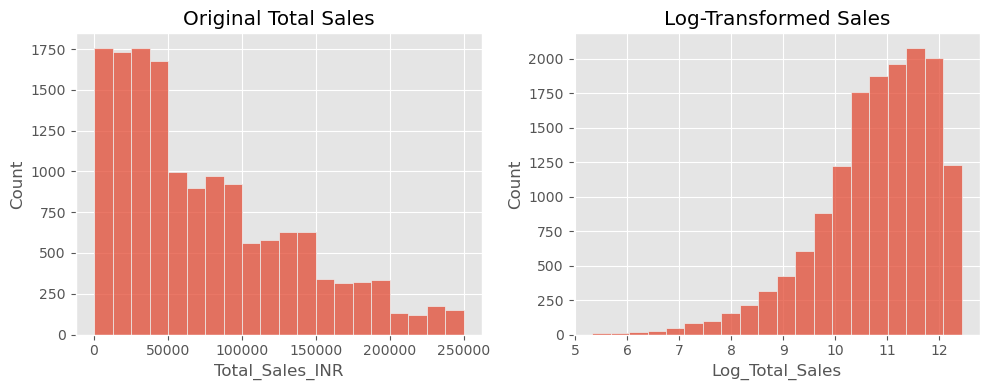

In [6]:
df["Log_Total_Sales"] = np.log1p(df["Total_Sales_INR"])

fig, ax = plt.subplots(1, 2, figsize=(10,4))
sns.histplot(df["Total_Sales_INR"], bins=20, ax=ax[0])
ax[0].set_title("Original Total Sales")

sns.histplot(df["Log_Total_Sales"], bins=20, ax=ax[1])
ax[1].set_title("Log-Transformed Sales")

plt.tight_layout()
plt.show()


**Interpretation**
1. Skew is significantly reduced.
2. Patterns among medium and high-value purchases become clearer.
3. Useful for normalizing the dataset in later modeling or dashboard trends.

In [7]:
category_avg = df.groupby("Product_Category")["Unit_Price_INR"].mean()
df["Category_Avg_Price"] = df["Product_Category"].map(category_avg)

df[["Product_Category", "Category_Avg_Price"]].head()


,Product_Category,Category_Avg_Price
0,Home & Kitchen,24629.593687
1,Beauty,25156.377721
2,Electronics,24934.357665
3,Electronics,24934.357665
4,Clothing,24863.101009


**Interpretation**
1. Electronics likely has higher average prices - explains higher revenue.
2. Price levels may affect return patterns or satisfaction rates.
3. Supports deeper category-based analysis (RQ1, RQ2).

In [8]:
payment_dummies = pd.get_dummies(df["Payment_Method"], prefix="Pay")
df = pd.concat([df, payment_dummies], axis=1)

df.head()


,Order_ID,Date,Customer_ID,Product_Category,Product_Name,Quantity,Unit_Price_INR,Total_Sales_INR,Payment_Method,Delivery_Status,...,Delivery_Delivered,Delivery_Pending,Delivery_Returned,Satisfied,Log_Total_Sales,Category_Avg_Price,Pay_Cash on Delivery,Pay_Credit Card,Pay_Debit Card,Pay_UPI
0,ORD100000,2025-01-25,CUST2796,Home & Kitchen,Cookware Set,2,25574.41,51148.82,Credit Card,Returned,...,False,False,True,0,10.842514,24629.593687,False,True,False,False
1,ORD100001,2025-08-28,CUST9669,Beauty,Hair Dryer,1,19361.41,19361.41,Debit Card,Returned,...,False,False,True,1,9.871089,25156.377721,False,False,True,False
2,ORD100002,2025-02-27,CUST5808,Electronics,Tablet,3,38476.22,115428.66,Cash on Delivery,Delivered,...,True,False,False,0,11.656417,24934.357665,True,False,False,False
3,ORD100003,2025-02-24,CUST5889,Electronics,Headphones,5,38145.72,190728.60,Credit Card,Delivered,...,True,False,False,1,12.158612,24934.357665,False,True,False,False
4,ORD100004,2025-06-15,CUST9005,Clothing,Saree,5,45940.98,229704.90,UPI,Delivered,...,True,False,False,1,12.344555,24863.101009,False,False,False,True


**Interpretation**
1. Enables comparing return rates or spending levels by payment type.
2. Supports visualization grouping in the dashboard.
3. Helps answer RQ3.

In [9]:
df.head()

,Order_ID,Date,Customer_ID,Product_Category,Product_Name,Quantity,Unit_Price_INR,Total_Sales_INR,Payment_Method,Delivery_Status,...,Delivery_Delivered,Delivery_Pending,Delivery_Returned,Satisfied,Log_Total_Sales,Category_Avg_Price,Pay_Cash on Delivery,Pay_Credit Card,Pay_Debit Card,Pay_UPI
0,ORD100000,2025-01-25,CUST2796,Home & Kitchen,Cookware Set,2,25574.41,51148.82,Credit Card,Returned,...,False,False,True,0,10.842514,24629.593687,False,True,False,False
1,ORD100001,2025-08-28,CUST9669,Beauty,Hair Dryer,1,19361.41,19361.41,Debit Card,Returned,...,False,False,True,1,9.871089,25156.377721,False,False,True,False
2,ORD100002,2025-02-27,CUST5808,Electronics,Tablet,3,38476.22,115428.66,Cash on Delivery,Delivered,...,True,False,False,0,11.656417,24934.357665,True,False,False,False
3,ORD100003,2025-02-24,CUST5889,Electronics,Headphones,5,38145.72,190728.60,Credit Card,Delivered,...,True,False,False,1,12.158612,24934.357665,False,True,False,False
4,ORD100004,2025-06-15,CUST9005,Clothing,Saree,5,45940.98,229704.90,UPI,Delivered,...,True,False,False,1,12.344555,24863.101009,False,False,False,True


## Conclusion
- Added multiple new variables that directly support RQ1–RQ4.
- Reduced skew for Total Sales.
- Created interpretable group-level features (Satisfied, Delivered_Flag).
- Improved temporal analysis (Month, Quarter).
- Enhanced dashboard filter capability via dummies.

## Hypothesis Generation
1. Customers using Credit Card / UPI spend more than COD customers.
2. Delivery_Flag is a stronger predictor of satisfaction than Unit Price.
3. Categories with higher Category_Avg_Price produce more stable log-sales patterns.
4. Quarter may predict spikes in demand (e.g., Q4 = festival season).
5. Satisfied customers are more common in states with higher revenue tiers.

## Iteration Signals
1. Skew reduction via Log_Total_Sales suggests new plots will be easier to interpret.
2. Dummy variables enable multi-filter dashboards in Phase 6.
3. Satisfaction flag simplifies modeling and subgroup analysis.
4. Month and Quarter features support deeper time-series slicing.
5. No missing values - no need to revisit Phase 2 cleaning.